# Distribuição Conjunta - variáveis discretas (1o exemplo)

1. **Geração dos Dados**:
   - $X$ é uma variável aleatória que segue uma distribuição normal padrão (média 0, desvio padrão 1).
   - $Y$ é gerado como $Y = 2X + \epsilon$, onde $\epsilon$ é um termo de erro que também segue uma distribuição normal padrão. Isso cria uma relação linear entre $X$ e $Y$, com alguma variabilidade adicional.

2. **Visualização da Distribuição Conjunta**:
   - O gráfico de dispersão mostra as amostras da distribuição conjunta das variáveis $X$ e $Y$. A forma do gráfico reflete a relação linear entre $X$ e $Y$.

3. **Matriz de Covariância**:
   - A matriz de covariância $\text{Cov}(X, Y)$ quantifica a relação entre as variáveis. Se os valores da covariância forem positivos, como neste caso, isso indica que $X$ e $Y$ aumentam juntos.

O código abaixo gera um gráfico de dispersão mostrando a relação entre $X$ e $Y$.


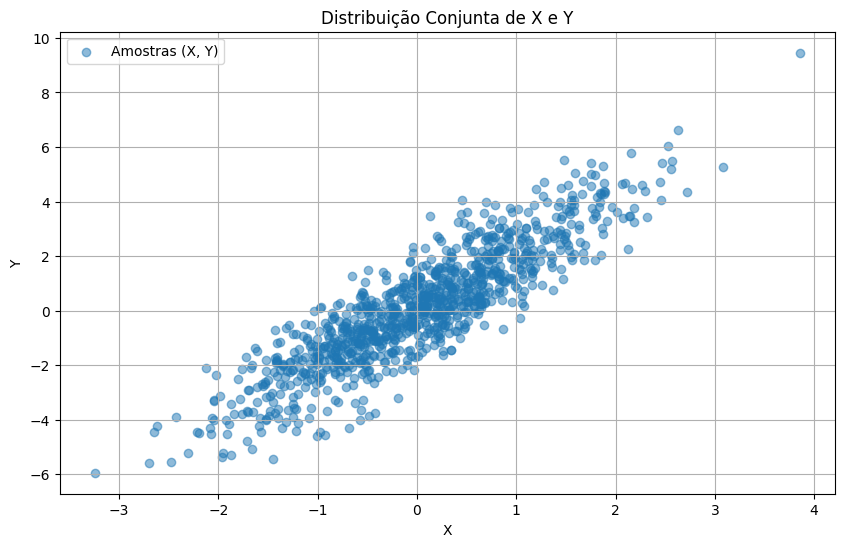

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo o número de amostras
n = 1000

# Gerando dados para X e Y
np.random.seed(42)  # Para reprodutibilidade
X = np.random.normal(loc=0, scale=1, size=n)
Y = 2 * X + np.random.normal(loc=0, scale=1, size=n)

# Visualizando a distribuição conjunta
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, alpha=0.5, label='Amostras (X, Y)')
plt.title('Distribuição Conjunta de X e Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


# Distribuição conjunta - variáveis discretas (2o exemplo)

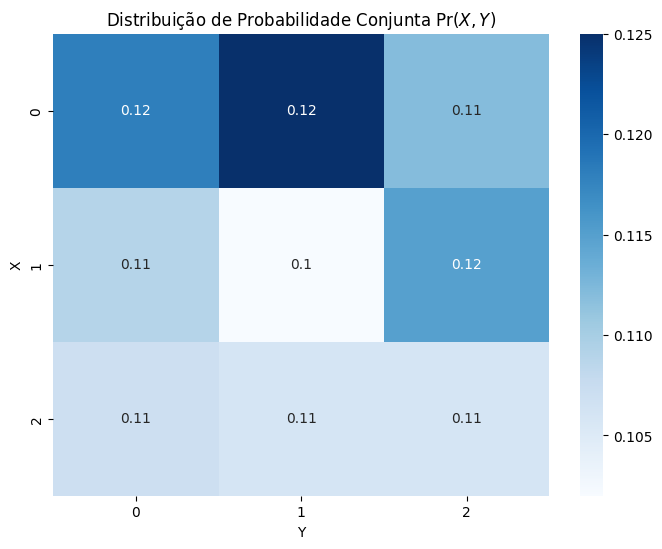

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Definindo as variáveis aleatórias X e Y
np.random.seed(42)
n_samples = 1000
X = np.random.randint(0, 3, n_samples)
Y = np.random.randint(0, 3, n_samples)

# Calculando a distribuição conjunta usando a função Counter
joint_distribution = Counter(zip(X, Y))

# Normalizando para obter a distribuição de probabilidade conjunta
total_samples = sum(joint_distribution.values())
for key in joint_distribution:
    joint_distribution[key] /= total_samples

# Exibindo a distribuição conjunta em forma de matriz
joint_matrix = np.zeros((3, 3))
for (x, y), prob in joint_distribution.items():
    joint_matrix[x, y] = prob

# Visualizando a distribuição conjunta
plt.figure(figsize=(8, 6))
sns.heatmap(joint_matrix, annot=True, cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.title("Distribuição de Probabilidade Conjunta $\Pr(X, Y)$")
plt.xlabel("Y")
plt.ylabel("X")
plt.show()


In [10]:
joint_matrix

array([[0.118, 0.125, 0.112],
       [0.109, 0.102, 0.115],
       [0.107, 0.106, 0.106]])

# Distribuição Conjunta - variáveis contínuas

O código na célula a seguir gera um gráfico 3D que mostra a superfície da distribuição conjunta de altura e peso. Regiões mais altas indicam combinações de altura e peso mais prováveis na população simulada.

1. Parâmetros da Distribuição: Definimos as médias ($\mu_𝑋$ e $\mu_Y$), os desvios padrão ($\sigma_𝑋$ e $\sigma_Y$) e o coeficiente de correlação ($\rho$) entre altura e peso:

2. Matriz de Covariância: Criamos a matriz de covariância que descreve a relação entre altura e peso.

3. Grade de Valores para $𝑋$ e $𝑌$: Geramos uma grade de valores possíveis para $𝑋$ (altura) e $𝑌$ (peso) para calcular a densidade conjunta em cada ponto dessa grade.

4. Distribuição Normal Multivariada: Utilizamos a função multivariate_normal da biblioteca scipy.stats para criar a distribuição normal bivariada usando as médias e a matriz de covariância.

5. Cálculo da Densidade Conjunta: Calculamos a função densidade conjunta em cada ponto da grade.

6. Visualização: Utilizamos a função plot_surface do matplotlib para criar um gráfico tridimensional que representa a superfície da densidade conjunta. 

/tmp/ipykernel_20371/1283928119.py:34: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


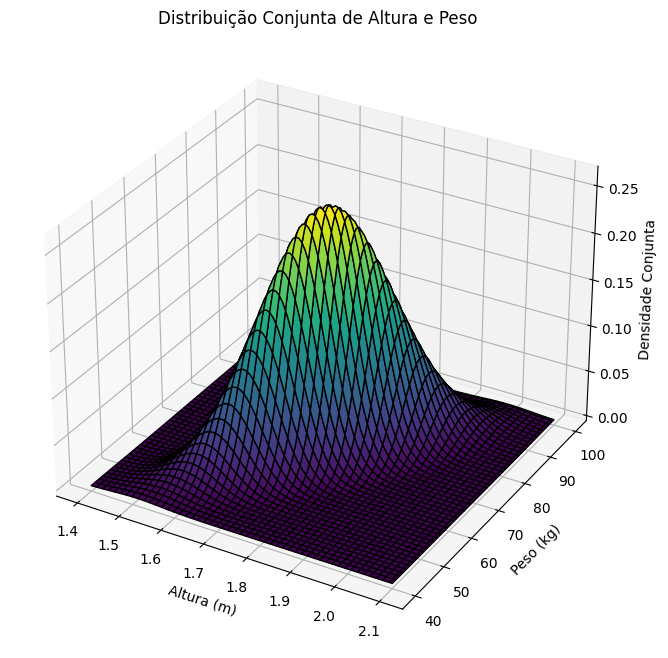

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Parâmetros da distribuição
mu_X = 1.75  # Média para a altura (em metros)
mu_Y = 70    # Média para o peso (em kg)
sigma_X = 0.1  # Desvio padrão para a altura
sigma_Y = 10   # Desvio padrão para o peso
rho = 0.8      # Coeficiente de correlação entre X e Y

# Matriz de covariância
cov_matrix = [[sigma_X**2, rho * sigma_X * sigma_Y], 
              [rho * sigma_X * sigma_Y, sigma_Y**2]]

# Criando uma grade de valores para X (altura) e Y (peso)
x = np.linspace(1.4, 2.1, 100)  # Valores possíveis para altura
y = np.linspace(40, 100, 100)   # Valores possíveis para peso
X, Y = np.meshgrid(x, y)

# Empacotando os valores de X e Y para usar na distribuição normal multivariada
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

# Criando a distribuição normal multivariada
rv = multivariate_normal([mu_X, mu_Y], cov_matrix)

# Calculando a função densidade de probabilidade conjunta
Z = rv.pdf(pos)

# Plotando a distribuição conjunta
fig = plt.figure(figsize=(10, 8))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k')

# Ajustes no gráfico
ax.set_xlabel('Altura (m)')
ax.set_ylabel('Peso (kg)')
ax.set_zlabel('Densidade Conjunta')
ax.set_title('Distribuição Conjunta de Altura e Peso')

plt.show()


# Distribuições Marginais

Distribuição Conjunta (X, Y):
[[0.1  0.2  0.1 ]
 [0.1  0.2  0.1 ]
 [0.05 0.05 0.05]]

Distribuição Marginal de X:
P(X=0) = 0.4
P(X=1) = 0.4
P(X=2) = 0.15000000000000002

Distribuição Marginal de Y:
P(Y=0) = 0.25
P(Y=1) = 0.45
P(Y=2) = 0.25


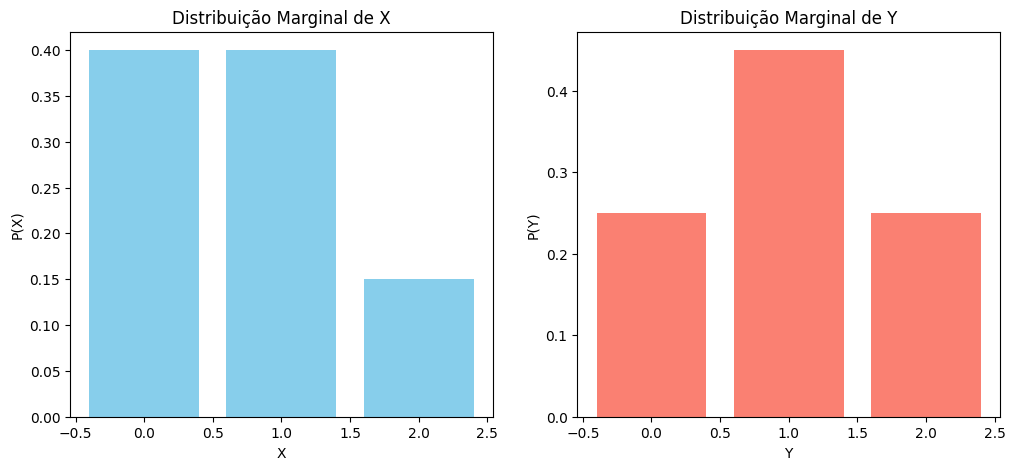

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo o espaço amostral e as probabilidades conjuntas
# Vamos usar 0, 1 e 2 para representar o número de caras ou coroas
espaco_amostral = [0, 1, 2]
prob_conjunta = np.array([
    [0.1, 0.2, 0.1],  # P(X=0, Y=0), P(X=0, Y=1), P(X=0, Y=2)
    [0.1, 0.2, 0.1],  # P(X=1, Y=0), P(X=1, Y=1), P(X=1, Y=2)
    [0.05, 0.05, 0.05]  # P(X=2, Y=0), P(X=2, Y=1), P(X=2, Y=2)
])

# Calculando a distribuição marginal de X somando ao longo das colunas
marginal_X = np.sum(prob_conjunta, axis=1)

# Calculando a distribuição marginal de Y somando ao longo das linhas
marginal_Y = np.sum(prob_conjunta, axis=0)

# Exibindo as distribuições
print("Distribuição Conjunta (X, Y):")
print(prob_conjunta)

print("\nDistribuição Marginal de X:")
for i, prob in enumerate(marginal_X):
    print(f"P(X={espaco_amostral[i]}) = {prob}")

print("\nDistribuição Marginal de Y:")
for i, prob in enumerate(marginal_Y):
    print(f"P(Y={espaco_amostral[i]}) = {prob}")

# Visualizando as distribuições marginais
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(espaco_amostral, marginal_X, color='skyblue')
plt.title("Distribuição Marginal de X")
plt.xlabel("X")
plt.ylabel("P(X)")

plt.subplot(1, 2, 2)
plt.bar(espaco_amostral, marginal_Y, color='salmon')
plt.title("Distribuição Marginal de Y")
plt.xlabel("Y")
plt.ylabel("P(Y)")

plt.show()


O código a seguir produz e imprime a matriz de covariância, que é uma forma de quantificar a dependência linear entre as duas variáveis aleatórias.

In [5]:
# Cálculo da matriz de covariância
cov_matrix = np.cov(X, Y)
print(f"Matriz de Covariância:\n{cov_matrix}")

Matriz de Covariância:
[[0.95886385 1.87826821]
 [1.87826821 4.67253268]]


# Correlação

O código a seguir gera três gráficos de dispersão, cada um ilustrando um tipo diferente de correlação entre duas variáveis.

1. **Correlação Positiva**: O primeiro subplot mostra uma correlação positiva onde `y` aumenta à medida que `x` aumenta.
2. **Correlação Negativa**: O segundo subplot mostra uma correlação negativa onde `y` diminui à medida que `x` aumenta.
3. **Sem Correlação**: O terceiro subplot mostra que não há correlação, onde os valores de `y` são independentes dos valores de `x`.



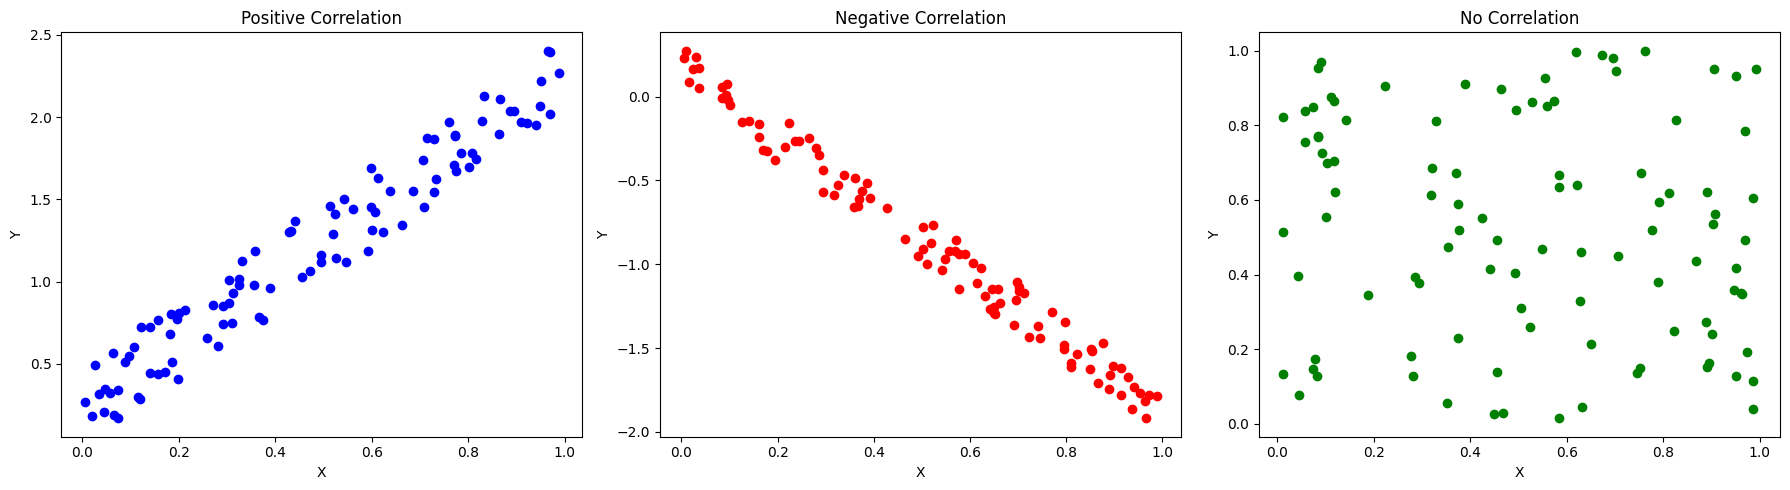

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Number of data points
n = 100

# Generate data for positive correlation
x_pos = np.random.rand(n)
y_pos = 2 * x_pos + np.random.rand(n) * 0.5  # y is positively correlated with x

# Generate data for negative correlation
x_neg = np.random.rand(n)
y_neg = -2 * x_neg + np.random.rand(n) * 0.3  # y is negatively correlated with x

# Generate data for no correlation
x_no_corr = np.random.rand(n)
y_no_corr = np.random.rand(n)  # y has no correlation with x

# Plotting the data
plt.figure(figsize=(18, 5))

# Positive correlation
plt.subplot(1, 3, 1)
plt.scatter(x_pos, y_pos, color='blue')
plt.title('Positive Correlation')
plt.xlabel('X')
plt.ylabel('Y')

# Negative correlation
plt.subplot(1, 3, 2)
plt.scatter(x_neg, y_neg, color='red')
plt.title('Negative Correlation')
plt.xlabel('X')
plt.ylabel('Y')

# No correlation
plt.subplot(1, 3, 3)
plt.scatter(x_no_corr, y_no_corr, color='green')
plt.title('No Correlation')
plt.xlabel('X')
plt.ylabel('Y')

# Show the plots
plt.tight_layout()
plt.show()


## Correlação - horas de estudos x nota obtida

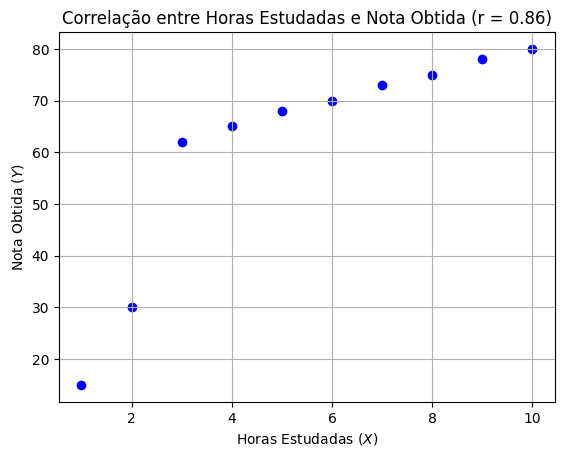

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Dados da tabela
alunos = range(1, 11)
horas_estudadas = [2, 4, 6, 8, 10, 1, 3, 5, 7, 9]
notas_obtidas = [30, 65, 70, 75, 80, 15, 62, 68, 73, 78]

# Calcula a correlação entre Horas Estudadas e Nota Obtida
correlacao = np.corrcoef(horas_estudadas, notas_obtidas)[0, 1]

# Criação do gráfico de dispersão
plt.scatter(horas_estudadas, notas_obtidas, color='blue')
plt.title(f'Correlação entre Horas Estudadas e Nota Obtida (r = {correlacao:.2f})')
plt.xlabel('Horas Estudadas ($X$)')
plt.ylabel('Nota Obtida ($Y$)')
plt.grid(True)

# Mostra o gráfico
plt.show()


## Correlação - idade (age) x pressão sanguínea (BP)

Considere a tabela abaixo, que apresenta dados de idade (`Age`, em anos) e pressão arterial sistólica (`BP`) de 20 indivíduos adultos.

|   Age |   BP |
|------:|-----:|
|    20 |  120 |
|    43 |  128 |
|    63 |  141 |
|    26 |  126 |
|    53 |  134 |
|    31 |  128 |
|    58 |  136 |
|    46 |  132 |
|    58 |  140 |
|    70 |  144 |
|    46 |  128 |
|    53 |  136 |
|    60 |  146 |
|    20 |  124 |
|    63 |  143 |
|    43 |  130 |
|    26 |  124 |
|    19 |  121 |
|    31 |  126 |
|    23 |  123 |


In [15]:
import numpy as np
import pandas as pd

data = {
 'Age': [20, 43, 63, 26, 53, 31, 58, 46, 58, 70, 46, 53, 60, 20, 63, 43, 26, 19, 31, 23],
 'BP': [120, 128, 141, 126, 134, 128, 136, 132, 140, 144, 128, 136, 146, 124, 143, 130, 124, 121, 126, 123]
}

df = pd.DataFrame(data)

df.head(20)

,Age,BP
0,20,120
1,43,128
2,63,141
3,26,126
4,53,134
5,31,128
6,58,136
7,46,132
8,58,140
9,70,144


In [16]:
df.mean()

Age     42.6
BP     131.5
dtype: float64

In [17]:
df.describe()

,Age,BP
count,20.000000,20.000000
mean,42.600000,131.500000
std,16.831674,8.062258
min,19.000000,120.000000
25%,26.000000,125.500000
50%,44.500000,129.000000
75%,58.000000,137.000000
max,70.000000,146.000000


<AxesSubplot:xlabel='Age', ylabel='BP'>

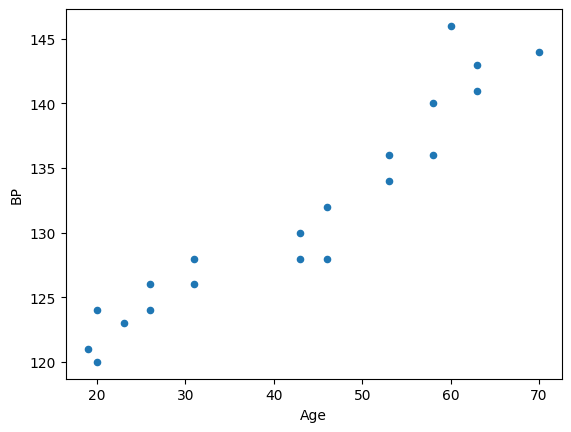

In [18]:
df.plot.scatter(x='Age', y='BP')

In [19]:
df.cov()

,Age,BP
Age,283.305263,128.842105
BP,128.842105,65.000000


In [20]:
df.corr()

,Age,BP
Age,1.000000,0.949454
BP,0.949454,1.000000


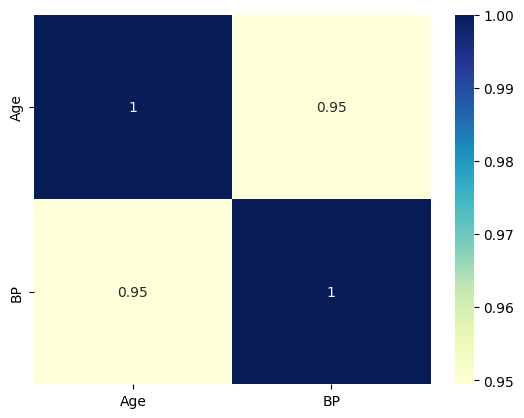

In [21]:
import seaborn as sb

# plotting correlation heatmap
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)

# Associação não-linear

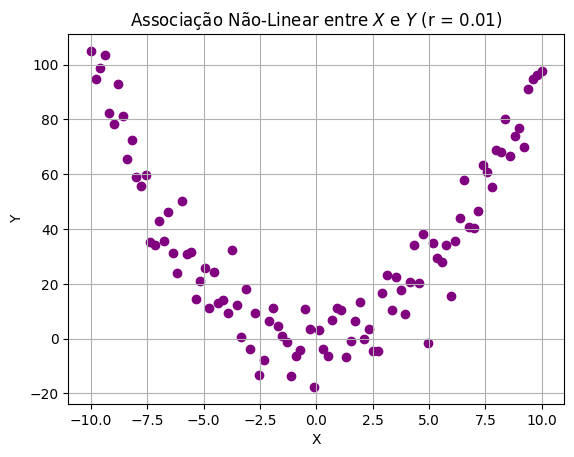

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generate data
x = np.linspace(-10, 10, 100)
y = x**2 + np.random.normal(0, 10, size=x.shape)  # Parabolic relationship with some noise

# Calculate the correlation coefficient
correlacao = np.corrcoef(x, y)[0, 1]

# Plotting the data
plt.scatter(x, y, color='purple')
plt.title(f'Associação Não-Linear entre $X$ e $Y$ (r = {correlacao:.2f})')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)

# Show the plot
plt.show()


# Correlação não implica em causalidade!

O termo "correlação não implica em causalidade" refere-se ao princípio de que, mesmo que duas variáveis estejam correlacionadas, isso não significa necessariamente que uma delas cause a outra. Em outras palavras, a presença de uma correlação (ou seja, uma relação estatística) entre duas variáveis não é suficiente para inferir que mudanças em uma variável são a causa das mudanças na outra.

Exemplos:

- **Terceira Variável** (Fator de Confusão): Imagine que há uma correlação entre o aumento nas vendas de sorvete e o aumento no número de afogamentos. Isso não significa que a compra de sorvete cause afogamentos. Na verdade, ambos podem ser influenciados por uma terceira variável comum, como o clima quente, que leva tanto ao aumento no consumo de sorvete quanto ao aumento no número de pessoas que vão nadar, aumentando assim o risco de afogamento.

- **Correlação Espúria**: Às vezes, duas variáveis podem parecer correlacionadas por mero acaso ou devido a uma coincidência estatística, sem qualquer relação causal entre elas. Um exemplo clássico é a correlação entre o consumo de margarina e a taxa de divórcios em um determinado país. Embora os dados possam mostrar uma correlação, não há nenhum mecanismo plausível que ligue as duas variáveis de forma causal.

**Por que é importante entender isso?**

> Na análise de dados e na ciência, é crucial não confundir correlação com causalidade, pois isso pode levar a conclusões incorretas e a decisões baseadas em premissas erradas. Para estabelecer causalidade, são necessários estudos adicionais, como experimentos controlados ou análises mais profundas, que possam eliminar a influência de fatores de confusão e verificar uma relação de causa e efeito direta

Para ilustrar esse fenômeno, podemos gerar duas variáveis aleatórias que são ambas dependentes de uma terceira variável:
- $X$ é uma variável aleatória.
- $Y$ é outra variável aleatória que é influenciada pela mesma terceira variável, $Z$.

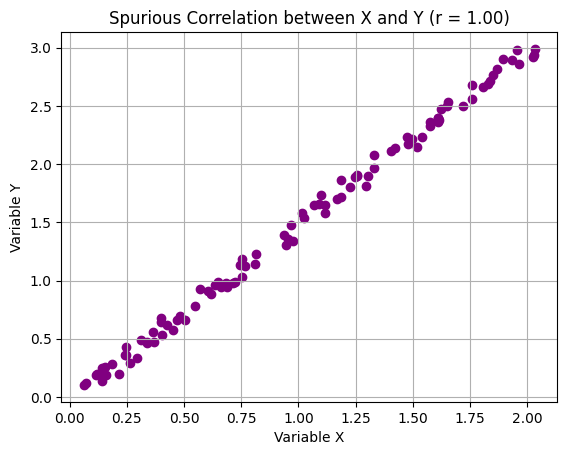

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generate the third variable Z
Z = np.random.rand(100)

# Generate X and Y based on Z, introducing spurious correlation
X = 2 * Z + np.random.rand(100) * 0.1  # X is influenced by Z
Y = 3 * Z + np.random.rand(100) * 0.1  # Y is influenced by Z

# Calculate the correlation between X and Y
correlation = np.corrcoef(X, Y)[0, 1]

# Plotting the data
plt.scatter(X, Y, color='purple')
plt.title(f'Spurious Correlation between X and Y (r = {correlation:.2f})')
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.grid(True)

# Show the plot
plt.show()
